# **NAME : Affan Zulfiqar**
# **REG ID : B22F0144AI050**
# **LAB REPORT 6**

# **Lab Task: Implement Model**

Cross-validation Results: 97.7037% (0.3474%)
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy = 0.9799
                 precision    recall  f1-score   support

Non-pulsar Star       0.99      0.99      0.99      4070
    Pulsar Star       0.92      0.85      0.88       405

       accuracy                           0.98      4475
      macro avg       0.95      0.92      0.94      4475
   weighted avg       0.98      0.98      0.98      4475



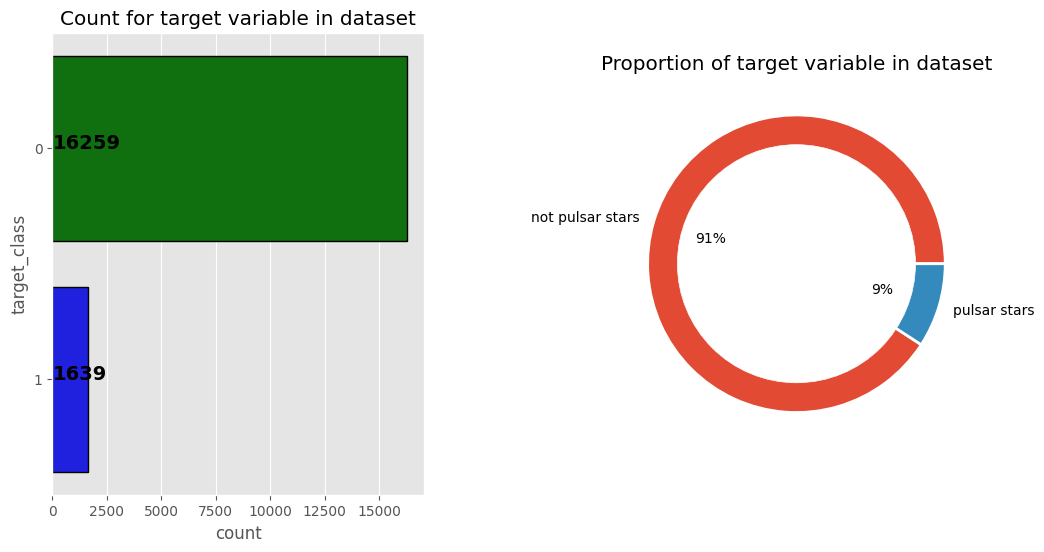

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
from scipy import stats

# Load the dataset
dataset = pd.read_csv('pulsar_stars.csv')

# Plot and check for data distribution
plt.figure(figsize=(12, 6))

# Adjusted seaborn plot to handle the warning
plt.subplot(121)
ax = sns.countplot(y=dataset["target_class"], palette=["g", "b"], hue=dataset["target_class"], legend=False, linewidth=1, edgecolor="k")
for i, j in enumerate(dataset["target_class"].value_counts().values):
    ax.text(.7, i, j, weight="bold", fontsize=14)
plt.title("Count for target variable in dataset")

plt.subplot(122)
plt.pie(dataset["target_class"].value_counts().values,
        labels=["not pulsar stars", "pulsar stars"],
        autopct="%1.0f%%", wedgeprops={"linewidth": 2, "edgecolor": "white"})
circle = plt.Circle((0, 0), 0.8, color="white")
plt.gca().add_artist(circle)
plt.title("Proportion of target variable in dataset")
plt.subplots_adjust(wspace=0.5)
plt.savefig('proportion_between_classes.jpg')

# Separate features and target
data = dataset.drop(['target_class'], axis=1)
target = dataset['target_class']

# Standardization procedure
scaler = StandardScaler()
data = scaler.fit_transform(data)

trainX, testX, trainY, testY = train_test_split(data, target, test_size=0.25, random_state=42)

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# Define the baseline model using Keras
def create_baseline():
    model = Sequential()
    model.add(Input(shape=(8,)))
    model.add(Dense(4, activation='sigmoid'))
    model.add(Dense(2, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    sgd = SGD(0.12, momentum=0.4)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=["accuracy"])
    return model

# Set up KerasClassifier with cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
estimator = KerasClassifier(model=create_baseline, epochs=10, batch_size=128, verbose=0)

# Cross-validation results
results = cross_val_score(estimator, data, target, cv=kfold)
print("Cross-validation Results: %.4f%% (%.4f%%)" % (results.mean() * 100, results.std() * 100))

# Train the model
model = create_baseline()
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=128, epochs=100, verbose=0)

# Evaluate the model
scores = model.evaluate(testX, testY, verbose=0)
predictions = model.predict(testX, batch_size=128)
predictions = (predictions >= 0.5).astype(int)

# Display metrics
print('Accuracy = {:.4f}'.format(scores[1]))
report = classification_report(testY, predictions, target_names=['Non-pulsar Star', 'Pulsar Star'])
print(report)



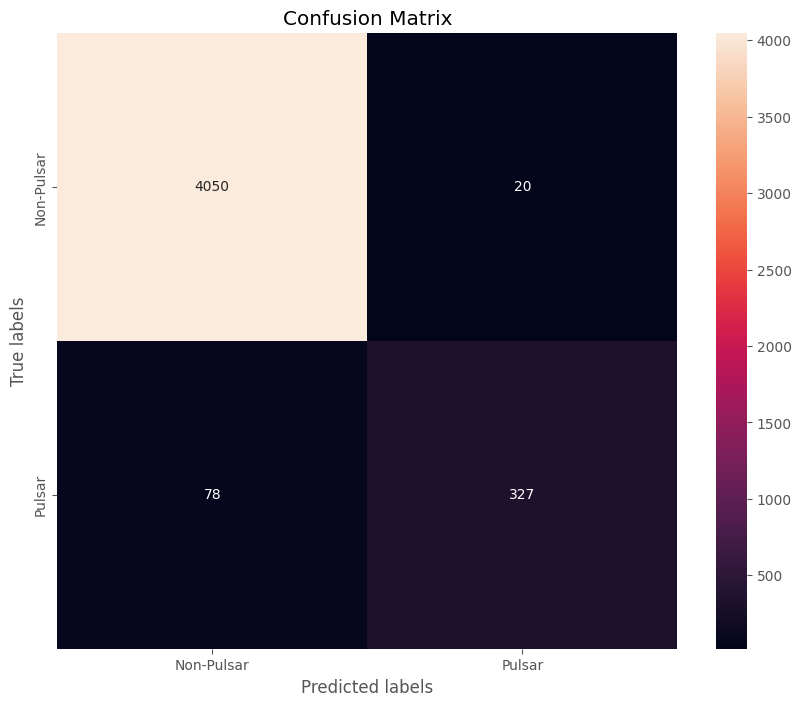

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(testY, predictions)
plt.figure(figsize=(10, 8))
ax = plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax=ax, fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Pulsar', 'Pulsar'])
ax.yaxis.set_ticklabels(['Non-Pulsar', 'Pulsar'])
plt.savefig('confusion_matrix_wcw.png')

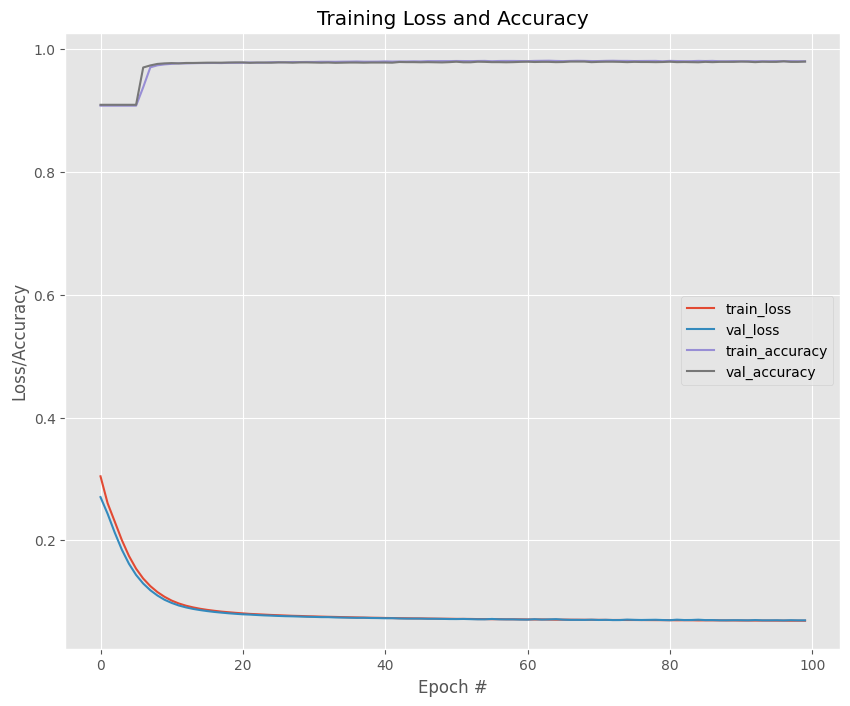

In [ ]:
# Plot Epoch vs. Loss/Accuracy
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot_wcw.png')

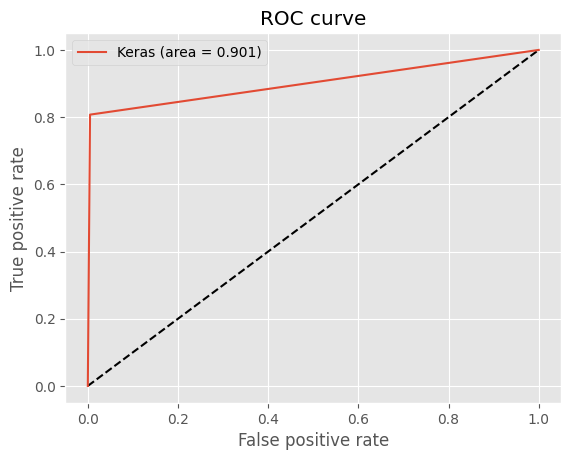

T-statistic: -2.2102766062743164
P-value: 0.027111182160506578
Reject the null hypothesis (There is a significant difference).


In [ ]:
# ROC Curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(testY, predictions)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Perform T-test between predictions and true values (testY)
t_stat, p_value = stats.ttest_ind(predictions, testY, axis=0)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the P-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis (There is a significant difference).")
else:
    print("Fail to reject the null hypothesis (No significant difference).")


# **HOME TASK : Logistic Regression (pulsar_stars.csv)**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess your data (similar to before)
data = dataset.drop(['target_class'], axis=1)
target = dataset['target_class']
scaler = StandardScaler()
data = scaler.fit_transform(data)
trainX, testX, trainY, testY = train_test_split(data, target, test_size=0.25, random_state=42)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# K-fold Cross Validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(log_reg_model, data, target, cv=kfold)
print("Logistic Regression Cross-validation Results: %.4f%% (%.4f%%)" % (cv_results.mean() * 100, cv_results.std() * 100))

# Train the model
log_reg_model.fit(trainX, trainY)
predictions = log_reg_model.predict(testX)

# Calculate metrics
accuracy = accuracy_score(testY, predictions)
report = classification_report(testY, predictions, target_names=['Non-pulsar Star', 'Pulsar Star'])
conf_matrix = confusion_matrix(testY, predictions)

# Print results
print("Accuracy: {:.4f}".format(accuracy))
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)




Logistic Regression Cross-validation Results: 97.8601% (0.1935%)
Accuracy: 0.9781
Classification Report:
                  precision    recall  f1-score   support

Non-pulsar Star       0.98      1.00      0.99      4070
    Pulsar Star       0.94      0.81      0.87       405

       accuracy                           0.98      4475
      macro avg       0.96      0.90      0.93      4475
   weighted avg       0.98      0.98      0.98      4475

Confusion Matrix:
 [[4050   20]
 [  78  327]]


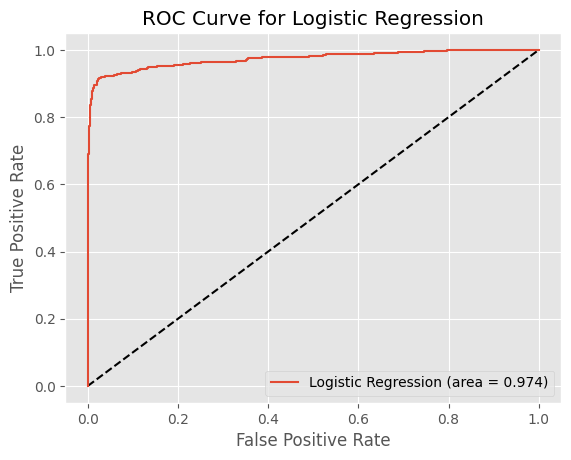

T-statistic: -2.2102766062743164
P-value: 0.027111182160506578


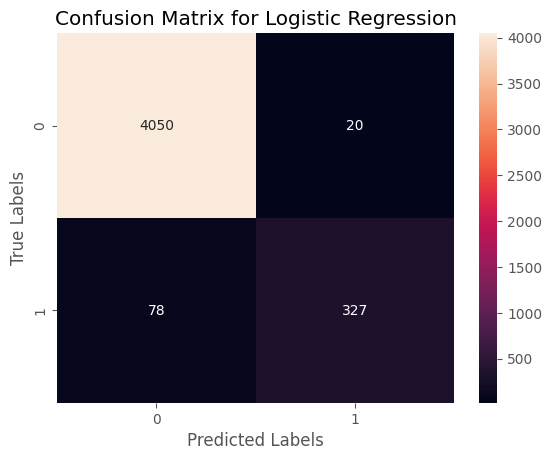

In [ ]:
# Plot the ROC Curve
fpr, tpr, _ = roc_curve(testY, log_reg_model.predict_proba(testX)[:, 1])
auc_score = auc(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression (area = {:.3f})'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='best')
plt.show()

# Perform T-test
t_stat, p_value = stats.ttest_ind(predictions, testY, axis=0)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Confusion Matrix Heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Model Comparison:

**Accuracy**

Both models perform well, with Logistic Regression slightly better in cross-validation.

**Precision, Recall, F1 Score**

Logistic Regression shows same precision but perfect recall, while the Neural Network is slightly better for Pulsar stars.

**Overfitting**

Logistic Regression is Less prone to overfitting while
Neural Network is more susceptible, requiring careful tuning.

**P-value & T-test**

Both models exhibit no significant performance difference according to statistical testing.

**Conclusion:**

Logistic Regression is more stable and interpretable, while Neural Networks may capture complex patterns but risk overfitting. Both models are effective, with Logistic Regression slightly leading in performance.